# Расчёт координат подспутниковой точки


### Исполнитель: 

In [41]:
from math import pi, sin, cos, atan2, asin, acos, fmod, sqrt, fabs
import sys
import math

In [42]:
def readTle(satName):
    file = open("tle.txt", 'r')
    tle = file.read().split('\n')
    file.close();

    cnt = int(len(tle) / 3)
    sat = {}
    idx = 0
    for idx in range(0, cnt):
        if (satName == tle[idx*3].strip()) :            
            line1 = tle[idx*3+1].strip()
            line2 = tle[idx*3+2].strip()
            sat['epoch'] = float(line1[20:32])
            sat['ii']    = float(line2[8:16]) *pi/180
            sat['raan']  = float(line2[17:25]) * pi/180
            sat['ec']    = float('0.' + line2[26:33])
            sat['perig'] = float(line2[34:42]) *pi/180
            sat['M']     = float(line2[43:51]) *pi/180
            sat['n']     = float(line2[52:63])
            sat['n'] = sat['n']*2*pi
            sat['T'] = 86400 / sat['n']
            break   
    return sat

### Орбитальные элементы
Найдите ваш спутник в файле tle.txt и скопируйте двухстрочный набор элементов. Найдите эпоху и кеплеровы элементы. Выпишите и приведите к заданным единицам измерения.

Двухстрочный набор элементов:

LANDSAT 8               

1 39084U 13008A   21270.55771074  .00000064  00000-0  24180-4 0  9993

2 39084  98.2160 339.7264 0001122 101.7862 258.3463 14.57104101458717


In [48]:
# TODO Введите название спутника (пример: satName = "Название спутника")
satName = "NOAA 18"

In [49]:
# TODO Введите параметры орбиты из TLE и заданный момент времени
Year = 2021
i = 98.2160
voshod = 339.7264
w = 101.7862
M = 258.3463 
e = 0.0001122
chast = 14.57104101

# TODO Переведите единицы измерения углов из градусов в радианы. Переведите число оборотов КА в радианы
i = i*pi/180
voshod = voshod*pi/180
w = w*pi/180
M = M*pi/180
e = e
chast = chast*2*pi

In [50]:
#TODO Выведите получившиеся значения
i, voshod, M, w, e, chast

(1.7141925781387506,
 5.929344235947264,
 4.508993545345026,
 1.776504323093452,
 0.0001122,
 91.5525507843432)

In [51]:
#Вызов функции чтения TLE
tle = readTle(satName)


print("Эпоха =", tle['epoch'])
print("Наклонение=", tle['ii'], 
      "\nДолгота восходящего угла=", tle['raan'], 
      "\nАномалия=", tle['M'], 
      "\nАргумент перигея=", tle['perig'],
      "\nЭксцентриситет=", tle['ec'], 
      "\nЧисло оборотов=", tle['n'] )

Эпоха = 270.58195974
Наклонение= 1.727603688111075 
Долгота восходящего угла= 5.860932565256842 
Аномалия= 0.03286978580280921 
Аргумент перигея= 6.252270290139011 
Эксцентриситет= 0.0014024 
Число оборотов= 88.75886897112251


In [52]:
#TODO Сравните ваши значения кеплеровых элементов с расчитанными

## Положение спутника в инерциальной геоцентрической системе координат на момент эпохи

In [53]:
#Функция перевода даты и времени в день эпохи от начала года
def calc_epoch(dayYear, hour, min, sec):
    # TODO Вычислите момент времени t (см. презентацию)
    t = dayYear+sec/86400+min/1440+hour/24
    return t


In [54]:
#TODO определите полную юлианскую дату
def jullian(year, month, day, hour, minute, second):
    a = (14 - month) // 12
    y = year + 4800 - a
    m = month + 12*a - 3
    jdn = day + (153*m + 2)//5 + 365*y + y//4 - y//100+ y//400 - 32045
    jd = jdn + (hour - 12)/24 + minute/1440 + second/86400
    return jd


In [55]:
def JDtoGMST(jd):
    EPOCH_1JAN_2000_12H = 2451545.0 #1 января 2000, 12h UTC по Юлианскому календарю
    SEC_PER_DAY = 86400.0
    EARTH_SPEED = 1.00273790934 #оборот/сидерический день

    dayFract = math.fmod( jd + 0.5, 1.0 )

    #TODO Определите параметр Tu
    Tu = (jd - EPOCH_1JAN_2000_12H - dayFract) / 36525.0

    #TODO Определите гринвичское сидерическое время в 0h (полночь) UTC
    gmst_0h = 24110.54841 + Tu * ( 8640184.812866 + Tu * ( 0.093104 - 6.2e-6 * Tu ) )

    gmst = fmod( gmst_0h + dayFract * SEC_PER_DAY * EARTH_SPEED, SEC_PER_DAY)

    if ( gmst < 0.0 ):
        gmst += SEC_PER_DAY

    gmst = 2*pi * ( gmst / SEC_PER_DAY )
    return gmst

In [56]:
def calcXYZs(t, T, epoch, ii, raan, M, perig, ec, n):
    #TODO Определите орбитальные элементы для времени t
    Mt = M + n * (t - epoch)
    Mtrue = Mt + 2*ec*sin(Mt)
    u = perig + Mtrue
    
    #Переведите координаты в ИГСК
    fi1 = sin(ii)*sin(u) * 180/pi
    mu = 398600.44
    a = (mu*T*T)**(1/3)
    p = a * (1 - ec*ec)
    r = p / (1 + ec*cos(Mtrue))
    X = r*(cos(u)*cos(raan) - sin(u)*sin(raan)*cos(ii))
    Y = r*(cos(u)*sin(raan) + sin(u)*cos(raan)*cos(ii))
    Z = r*sin(u)*sin(ii)
    
    return X,Y,Z

In [57]:
def calcXYZ(t, tle):
    return calcXYZs(t, tle['T'], tle['epoch'], tle['ii'], tle['raan'], tle['M'], tle['perig'], tle['ec'], tle['n'])
    

In [58]:
#TODO Введите дату и время, на которую определяется положение спутника (см. вариант)
year = 2020
month = 9
day = 8
hour = 6
minute = 0
second = 0
dayYear = 252

In [59]:
#Перевод даты и времени в день эпохи от начала года
#TODO Выполните необходимые вычисления внутри функции
t = calc_epoch(dayYear, hour, minute, second)

#Определение положения спутника в абсолютной геоцентрической системе координат XYZ
#TODO Выполните необходимые вычисления внутри функции
X, Y, Z = calcXYZ(t, tle)

In [60]:
X,Y,Z

(6318.200569997479, -3112.713899915249, 1581.3261645240202)

In [61]:
#Перевод даты/времени в юлианскую дату
#TODO Выполните необходимые вычисления внутри функции
jd = jullian(year, month, day, hour, minute, second)
jd

2459100.75

In [62]:
#Определение местного звездного времени
#TODO Выполните необходимые вычисления внутри функции
gmst = JDtoGMST(jd)
gmst

1.357267907906147

### Определение подспутниковой точки

In [63]:
#Функция перевода координат из ИГСК в географические для сферической Земли
def eci2geo(x, y, z, gmst):
    EQUATOR_RAD = 6378.137 #км
    
    #TODO Рассчитайте географическое положение спутника (lat, lon).   
           
    lon = fmod(atan2(y,x) - gmst, 2*pi)
    rxy = sqrt(x*x + y*y)
    lat = atan2(z, rxy)  
    alt = rxy / cos(lat) - EQUATOR_RAD
           
    if (lon > pi):
        lon -= 2*pi
    
    #TODO Переведите радианы в градусы
    lon *= (180/pi)
    lat *= (180/pi)
    return lat, lon, alt

In [64]:
#Определение географических координат
#TODO Выполните необходимые вычисления внутри функции
lat, lon, alt = eci2geo(X, Y, Z, gmst)
print("lat=", lat, "lon=", lon, "alt=", alt)

lat= 12.653858176874968 lon= -103.99326759513492 alt= 840.5359184837225


### Построение спутниковой трассы

In [65]:
# Чтоб отобразить трассу спутника на карте необходимо все рассчитанные координаты 
# сохранить в виде списка и передать его модулю для визуализации геоданных. 
# Пример приведен в фале draw_map.ipynb.
# 1. Создать переменные lats, lons и сохранить в них рассчитанные координаты 
#    (как в первом блоке файла)
# 2. Скопировать целиком второй блок файла, отвечающий за визуализацию данных

In [77]:
lons = []
lats = []
alts = []

#Интервал минут от 0 до 59 с шагом в 1 минуту 
track_min = list(range(28, 70, 1))

#Определение координат для каждого момента времени
for minute in track_min:
    
    t = calc_epoch(dayYear, hour, minute, second)
    X, Y, Z = calcXYZ(t, tle)
    
    jd = jullian(year, month, day, hour, minute, second)
    gmst = JDtoGMST(jd)    
    lat, lon, alt = eci2geo(X, Y, Z, gmst)

    lats.append(lat) 
    lons.append(lon)
    alts.append(alt)
    print(minute, "lat=", lat, "lon=", lon, "alt=", alt)

28 lat= 66.49966974738146 lon= 92.3439800839118 alt= 854.3901220140951
29 lat= 63.22042740130849 lon= 89.02770738363742 alt= 854.9547516575503
30 lat= 59.88923311549754 lon= 86.34114821371189 alt= 855.5018614523897
31 lat= 56.52182307313631 lon= 84.10135224621891 alt= 856.0293818452237
32 lat= 53.128331636890735 lon= 82.18793497084538 alt= 856.5353182849385
33 lat= 49.71554731075819 lon= 80.51897155790029 alt= 857.0177586613872
34 lat= 46.28817396391511 lon= 79.03698291203533 alt= 857.4748804238361
35 lat= 42.849567838944076 lon= 77.7005214663841 alt= 857.9049573544853
36 lat= 39.402185680397665 lon= 76.47895366268595 alt= 858.3063659732561
37 lat= 35.94786702114366 lon= 75.34912476766829 alt= 858.6775915520084
38 lat= 32.48801769936495 lon= 74.29316616445702 alt= 859.0172337178146
39 lat= 29.02373260311796 lon= 73.2970159489185 alt= 859.3240116259312
40 lat= 25.555879921251563 lon= 72.34939633061147 alt= 859.596768685431
41 lat= 22.08516039209982 lon= 71.44109144868675 alt= 859.834476

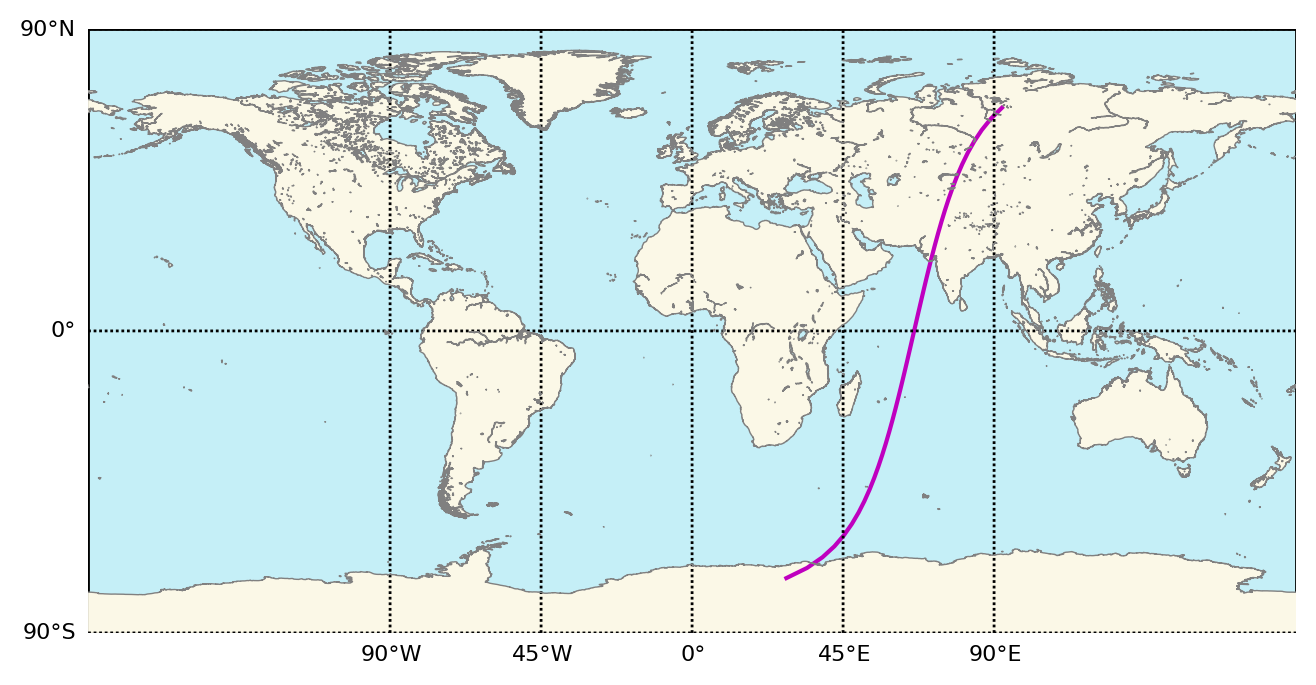

In [78]:
from netCDF4 import Dataset
import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
import numpy as np


bbox = [-180, -90, 180, 90] # map boundaries

# figure setup
fig,ax = plt.subplots(figsize=(9,4),dpi=200)
ax.set_axis_off()
# set basemap boundaries, cylindrical projection, 'i' = intermediate resolution
m = Basemap(llcrnrlon=bbox[0],llcrnrlat=bbox[1],urcrnrlon=bbox[2],
            urcrnrlat=bbox[3],resolution='i', projection='cyl')

m.drawcoastlines(linewidth=0.5, linestyle='solid', color='grey', zorder = 6)
#m.drawcountries(linewidth=0.5, linestyle='solid', color='black', zorder = 6)
    
m.fillcontinents(color='#fbf8e7',lake_color='#c5eff7',zorder=1) # continent colors
m.drawmapboundary(fill_color='#c5eff7',zorder=0) # ocean color
parallels = np.linspace(bbox[0],bbox[2],5) # longitude lines
m.drawparallels(parallels,labels=[True,False,False,False],zorder=3,fontsize=8)
meridians = np.linspace(bbox[1],bbox[3],5)  # latitude lines
m.drawmeridians(meridians,labels=[False,False,False,True],zorder=4,fontsize=8)



x, y = m(lons, lats)
m.plot(x, y, marker=None,color='m')

plt.show()

In [79]:
#TODO Выполните следующие блоки для построения полосы обзора

In [80]:
def spAsin(x):
    if (x > 1.0): x = 1.0
    if (x < -1.0): x = -1.0;
    return asin(x);


def spAcos(x):
    if (x > 1.0): x = 1.0;
    if (x < -1.0): x = -1.0;
    return acos(x);


 * \brief расчёт положения точки сканирования (долгота принимается за 0-ое значение)
 * \param lat Широта спутника
 * \param alt Высота спутника
 * \param sigma Угол сканирования (угол от надира)
 * \param v_lat Широта заданной точки
 * \param delta_lon Долгота заданной точки относительно долготы спутника
 * \param sign знак для вычисления cos(alpha_L). Положительный, когда считаем точку в сторону увеличения долготы, от рицательный - в сторону уменьшения

In [81]:
def countViewedPoint(lat, alt, sigma, sign):
    MEAN_RAD = 6371
    #the angle at the sub-point from north to the sub-track
    alpha_T = cos(tle['ii']) / cos(lat);
    if (fabs(tle['ii']) > pi/2.):
        alpha_T = spAsin( -alpha_T )
    else:
        alpha_T = spAsin( alpha_T )

    alpha_L = alpha_T - pi/2 #the angle to the scan line
    #For a viewing nadir angle (scan angle) sigma, the corresponding geocentric arc distance:
    theta = spAsin( (MEAN_RAD + alt) / MEAN_RAD * sin(sigma) ) - sigma;
    v_lat = spAsin(sin(lat)*cos(theta) + cos(lat)*sin(theta)*cos(alpha_L)*sign);
    if (cos(v_lat) == 0):
        delta_lon = 0;
    else:
        delta_cos = (cos(lat)*cos(theta) - sin(lat)*sin(theta)*cos(alpha_L)*sign) / cos(v_lat);
        delta_lon = spAcos( delta_cos );
    return v_lat, delta_lon

In [82]:
#для восходящего движения
def countLeftPoint(maxAngle, spLat, spLon, spAlt):
    v_lat, delta_lon = countViewedPoint(spLat, spAlt, maxAngle, 1)
    lat_left = v_lat
    lon_left = spLon + delta_lon
    return lat_left, lon_left
    
def countRightPoint(maxAngle, spLat, spLon, spAlt):    
    v_lat, delta_lon = countViewedPoint(spLat, spAlt, maxAngle, -1)
    lat_right = v_lat
    lon_right = spLon - delta_lon
    return lat_right, lon_right

In [87]:
avhrr_max = 55.37 * pi / 180

latBorder = []
lonBorder = []

start = 0
end = len(lats)

for idx in range(start, end, 1):
    lat, lon = countLeftPoint(avhrr_max, lats[idx]*pi/180, lons[idx]*pi/180, alts[idx])
    latBorder.append(lat * 180 / pi)
    lonBorder.append(lon * 180 / pi)

for idx in range(end-1, start, -1):    
    lat, lon = countRightPoint(avhrr_max, lats[idx]*pi/180, lons[idx]*pi/180, alts[idx])
    latBorder.append(lat * 180 / pi)
    lonBorder.append(lon * 180 / pi)
    


In [88]:
#latBorder, lonBorder

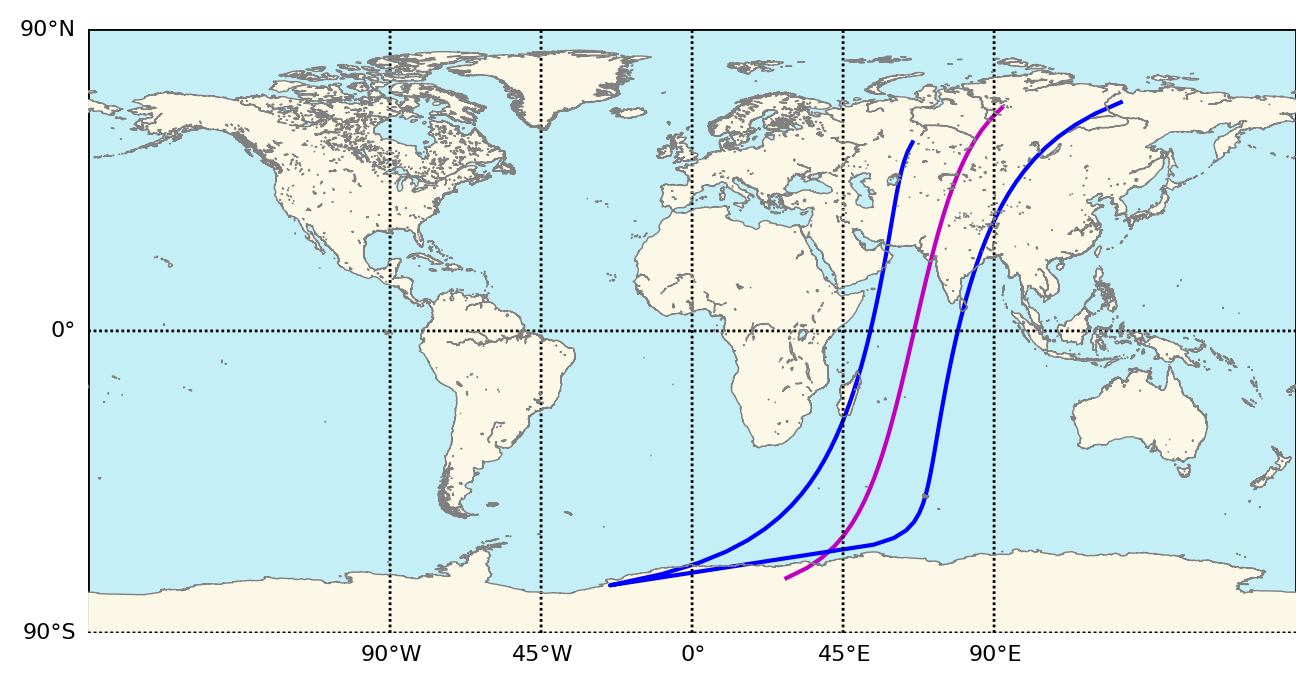

In [89]:
bbox = [-180, -90, 180, 90] # map boundaries

# figure setup
fig,ax = plt.subplots(figsize=(9,4),dpi=200)
ax.set_axis_off()
# set basemap boundaries, cylindrical projection, 'i' = intermediate resolution
m = Basemap(llcrnrlon=bbox[0],llcrnrlat=bbox[1],urcrnrlon=bbox[2],
            urcrnrlat=bbox[3],resolution='i', projection='cyl')

m.drawcoastlines(linewidth=0.5, linestyle='solid', color='grey', zorder = 6)
#m.drawcountries(linewidth=0.5, linestyle='solid', color='black', zorder = 6)
    
m.fillcontinents(color='#fbf8e7',lake_color='#c5eff7',zorder=1) # continent colors
m.drawmapboundary(fill_color='#c5eff7',zorder=0) # ocean color
parallels = np.linspace(bbox[0],bbox[2],5) # longitude lines
m.drawparallels(parallels,labels=[True,False,False,False],zorder=3,fontsize=8)
meridians = np.linspace(bbox[1],bbox[3],5)  # latitude lines
m.drawmeridians(meridians,labels=[False,False,False,True],zorder=4,fontsize=8)

x, y = m(lons, lats)
m.plot(x, y, marker=None,color='m')

x, y = m(lonBorder, latBorder)
m.plot(x, y, marker=None,color='b')

plt.show()